In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error

In [71]:
df = pd.read_excel('./data/ЛР6_Полные_данные.xlsx')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Респондент                                                                             36000 non-null  object 
 1   Сообщество                                                                             36000 non-null  object 
 2   Среднегодовой.доход,.тыс..$                                                            36000 non-null  float64
 3   Объем.потребленного.алкоголя.в.год,.л.                                                 36000 non-null  int64  
 4   Количество.членов.семьи                                                                36000 non-null  int64  
 5   Количество.лет.образования                                                

In [73]:
cantril_scale = {}
for i, cantril_type in enumerate(set(df['Ощущаемое.счастье'])):
    cantril_scale[cantril_type] = i

In [74]:
cantril_scale

{'Prospering': 0,
 'Doing well': 1,
 'Depressed': 2,
 'Coping': 3,
 'Thriving': 4,
 'Неизвестно': 5,
 'Blooming': 6,
 'Suffering': 7,
 'Strugglng': 8,
 'Hopeless': 9,
 'Just ok': 10}

In [75]:
len(cantril_scale)

11

In [76]:
df.head()

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming


In [77]:
# df['Ощущаемое.счастье'] = df['Ощущаемое.счастье'].map(lambda x: cantril_scale[x])
data_df = df.replace(cantril_scale)
data_df['Респондент'] = data_df['Респондент'].map(lambda x: int(x.split()[1].strip()))
data_df['Сообщество'] = data_df['Сообщество'].map(lambda x: int(x.split()[1].strip()))
data_df.pop('Респондент')
data_df.pop('Сообщество')

0        480
1        130
2        156
3         69
4        330
        ... 
35995    318
35996    384
35997    331
35998    402
35999    574
Name: Сообщество, Length: 36000, dtype: int64

In [78]:
data_df.head()

,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,3.771487,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,2
1,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,5.326782,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,6
2,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,5.687624,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,10
3,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,2.015103,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,2
4,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,1.695287,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,6


In [82]:
df[df['Ощущаемое.счастье'] != 'Неизвестно']['Ощущаемое.счастье']

0        Depressed
1         Blooming
2          Just ok
3        Depressed
4         Blooming
           ...    
35993      Just ok
35994    Suffering
35995    Suffering
35997     Thriving
35999      Just ok
Name: Ощущаемое.счастье, Length: 30000, dtype: object

In [105]:
known_df = data_df[data_df['Ощущаемое.счастье'] != cantril_scale['Неизвестно']]
unknown_df = data_df[data_df['Ощущаемое.счастье'] == cantril_scale['Неизвестно']]

In [11]:
known_df.head()

,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,3.771487,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,2
1,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,5.326782,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,6
2,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,5.687624,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,10
3,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,2.015103,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,2
4,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,1.695287,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,6


In [12]:
personal_columns = [
    "Среднегодовой.доход,.тыс..$",
    "Объем.потребленного.алкоголя.в.год,.л.",
    "Количество.членов.семьи",
    "Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%"
]

social_columns = [
    "Коэффициент.Джини.сообщества",
    "Издержки.сообщества.на.окружающую.среду,.млн..$",
    "Охват.беспроводной.связи.в.сообществе,.%",
    "Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",
    "Волатильность.потребительских.цен.в.сообществе"
]

happy_column = ['Ощущаемое.счастье']
state_columns = list(set(known_df.columns) - set(personal_columns) - set(social_columns) - set(happy_column))

In [125]:
classes_dict = cantril_scale.copy()

In [126]:
classes_dict.pop('Неизвестно')

5

In [127]:
print(classes_dict, len(classes_dict))

{'Prospering': 0, 'Doing well': 1, 'Depressed': 2, 'Coping': 3, 'Thriving': 4, 'Blooming': 6, 'Suffering': 7, 'Strugglng': 8, 'Hopeless': 9, 'Just ok': 10} 10


In [139]:
colors_dict = {
    'Prospering': 'lime',
    'Thriving': 'limegreen',
    'Blooming': 'green',
    'Doing well': 'palegreen',
    'Just ok': 'lightseagreen',
    'Coping': 'powderblue',
    'Strugglng': 'deepskyblue',
    'Suffering': 'orangered',
    'Depressed': 'red',
    'Hopeless': 'darkred',
}

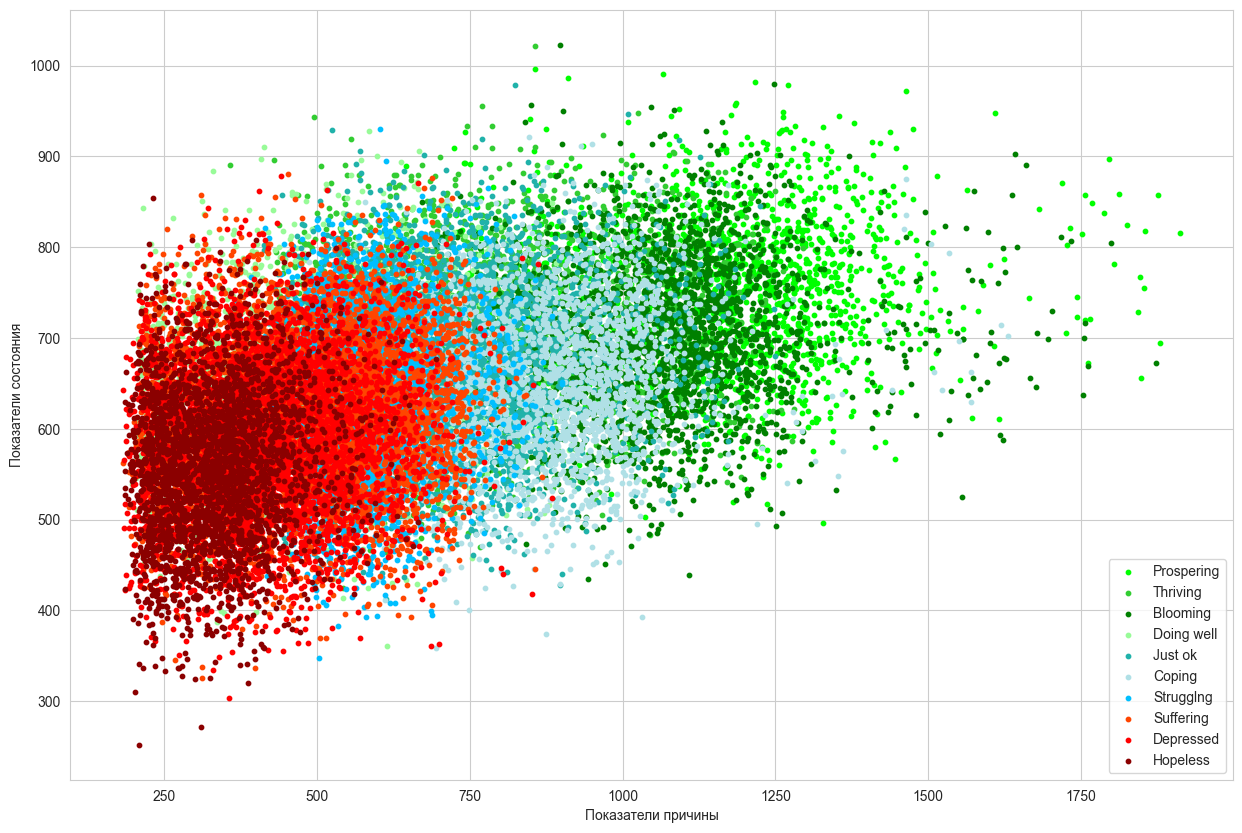

In [145]:
plt.figure(figsize=(15, 10))
for cls_name in colors_dict.keys():
    cls_num = classes_dict.get(cls_name)
    cls_color = colors_dict.get(cls_name)
    state_value = np.sum(known_df[known_df['Ощущаемое.счастье'] == cls_num][state_columns], axis=1)
    reason_value = np.sum(known_df[known_df['Ощущаемое.счастье'] == cls_num][personal_columns + social_columns], axis=1)
    plt.scatter(reason_value, state_value, color=cls_color, s=10, label=cls_name)

plt.xlabel('Показатели причины')
plt.ylabel('Показатели состояния')
plt.legend()
plt.show()

<Axes: >

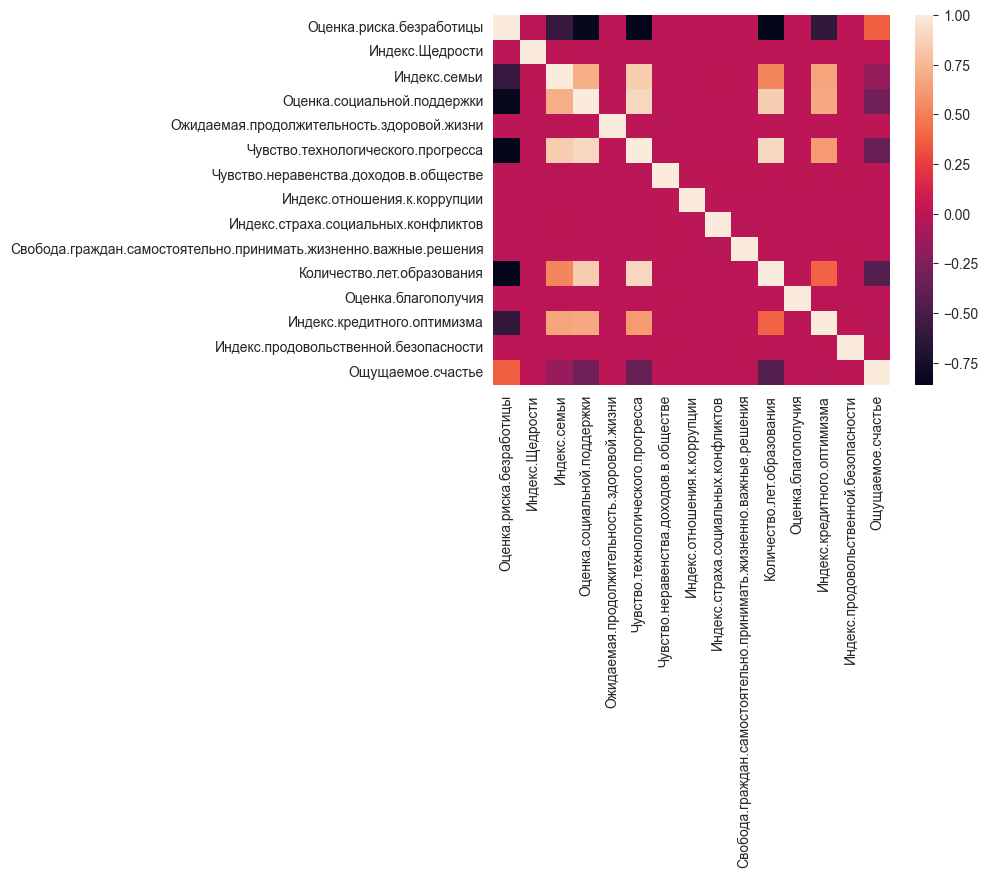

In [146]:
state_corr = known_df[state_columns + happy_column].corr()
sns.heatmap(state_corr)

<Axes: >

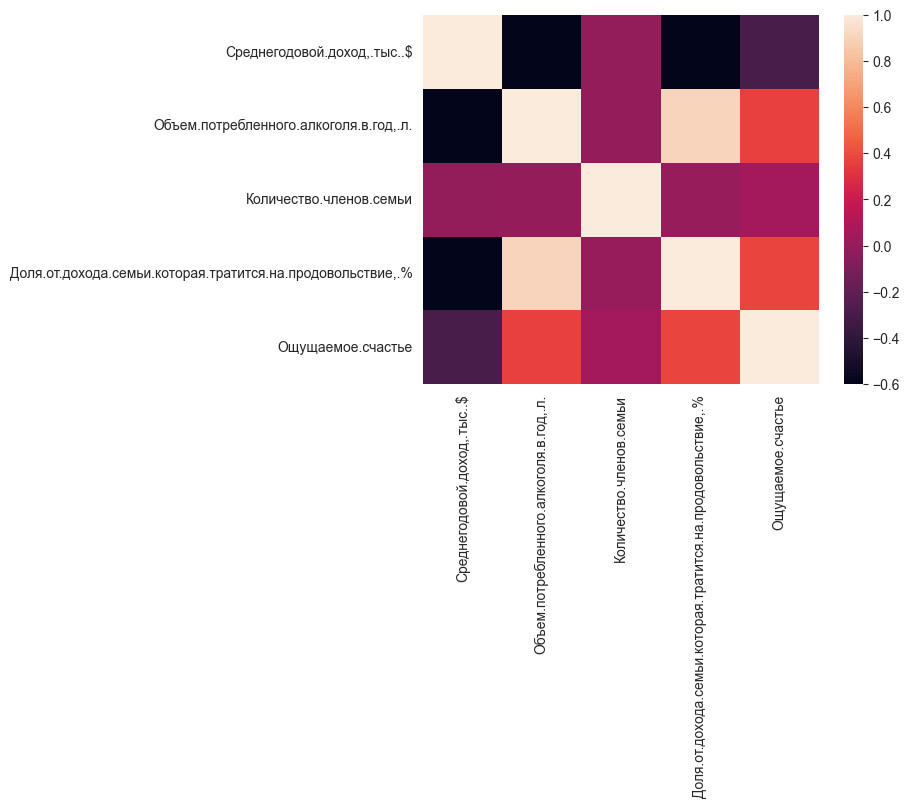

In [147]:
sns.heatmap(known_df[personal_columns + happy_column].corr())

<Axes: >

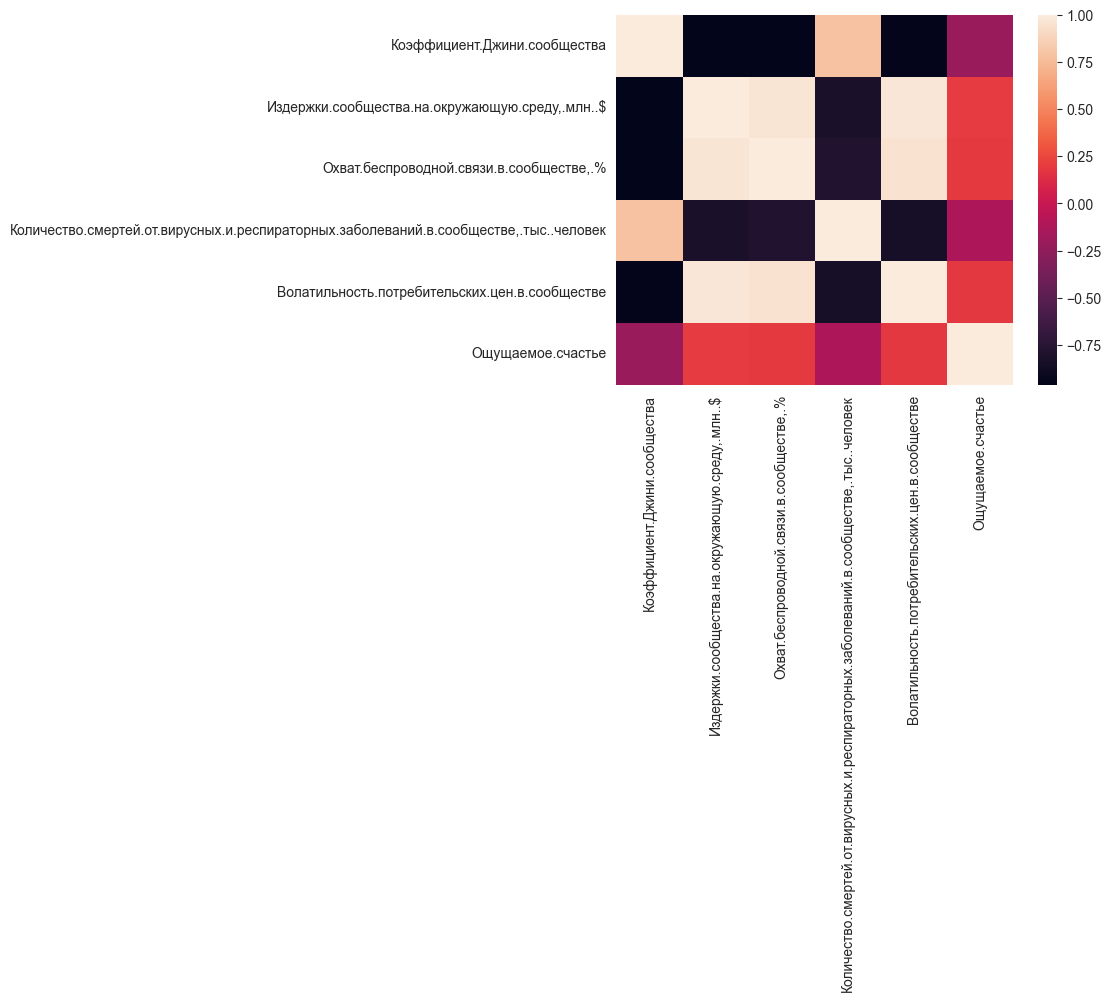

In [148]:
sns.heatmap(known_df[social_columns + happy_column].corr())

<Axes: >

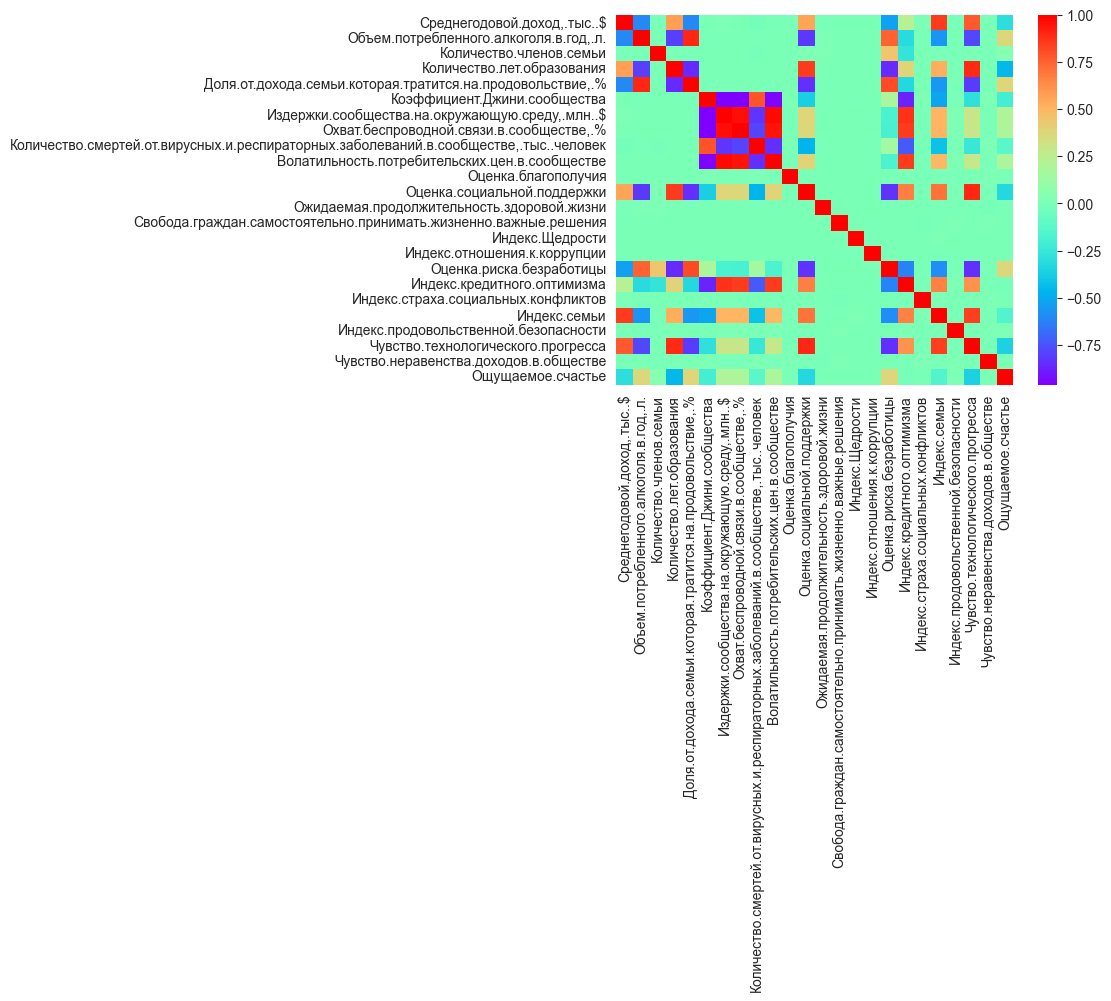

In [149]:
known_df_corr = known_df.corr()
sns.heatmap(known_df_corr, cmap='rainbow')

In [150]:
np.mean(known_df_corr['Ощущаемое.счастье'])

0.034461312770868835

In [151]:
corr_features = []

happy_corr = known_df_corr['Ощущаемое.счастье']
for i in range(len(happy_corr)):
    if abs(happy_corr[i]) >= 0.01:
        corr_features.append(i)

corr_features = corr_features[:-1]
corr_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 16, 17, 19, 21]

In [152]:
for i in corr_features:
    print(str(happy_corr.index[i]).replace('.', ' '))

Среднегодовой доход, тыс  $
Объем потребленного алкоголя в год, л 
Количество членов семьи
Количество лет образования
Доля от дохода семьи которая тратится на продовольствие, %
Коэффициент Джини сообщества
Издержки сообщества на окружающую среду, млн  $
Охват беспроводной связи в сообществе, %
Количество смертей от вирусных и респираторных заболеваний в сообществе, тыс  человек
Волатильность потребительских цен в сообществе
Оценка социальной поддержки
Оценка риска безработицы
Индекс кредитного оптимизма
Индекс семьи
Чувство технологического прогресса


In [153]:
happy_corr.index

Index(['Среднегодовой.доход,.тыс..$', 'Объем.потребленного.алкоголя.в.год,.л.',
       'Количество.членов.семьи', 'Количество.лет.образования',
       'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%',
       'Коэффициент.Джини.сообщества',
       'Издержки.сообщества.на.окружающую.среду,.млн..$',
       'Охват.беспроводной.связи.в.сообществе,.%',
       'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
       'Волатильность.потребительских.цен.в.сообществе', 'Оценка.благополучия',
       'Оценка.социальной.поддержки',
       'Ожидаемая.продолжительность.здоровой.жизни',
       'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',
       'Индекс.Щедрости', 'Индекс.отношения.к.коррупции',
       'Оценка.риска.безработицы', 'Индекс.кредитного.оптимизма',
       'Индекс.страха.социальных.конфликтов', 'Индекс.семьи',
       'Индекс.продовольственной.безопасности',
       'Чувство.технологического.прогресса',
       'Чувство.не

In [154]:
happy_corr

Среднегодовой.доход,.тыс..$                                                             -0.294475
Объем.потребленного.алкоголя.в.год,.л.                                                   0.366113
Количество.членов.семьи                                                                  0.049715
Количество.лет.образования                                                              -0.452188
Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%                               0.380295
Коэффициент.Джини.сообщества                                                            -0.204209
Издержки.сообщества.на.окружающую.среду,.млн..$                                          0.197531
Охват.беспроводной.связи.в.сообществе,.%                                                 0.195686
Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек   -0.121146
Волатильность.потребительских.цен.в.сообществе                                           0.187661
Оценка.благополучия 

In [155]:
x = np.array([
    [row[i] for i in range(len(row)) if i in corr_features] for row in known_df.values
])
y = known_df['Ощущаемое.счастье'].values

print(x.shape, y.shape)

(30000, 15) (30000,)


In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24000, 15) (6000, 15) (24000,) (6000,)


In [157]:
y_train

array([ 9,  3, 10, ...,  0,  4, 10], dtype=int64)

In [158]:
from umap import UMAP

In [159]:
x_umap_test = UMAP(n_neighbors=100, random_state=42).fit_transform(x_test)

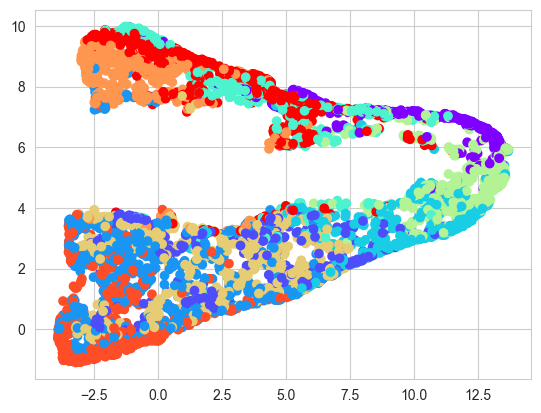

In [160]:
plt.scatter(x_umap_test[:,0], x_umap_test[:,1], c=y_test, cmap='rainbow')
plt.show()

In [161]:
clf = MLPClassifier()
clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred_clf))

1.4498333333333333


In [162]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)
print(mean_squared_error(y_test, y_pred_log))

1.147


C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print(mean_squared_error(y_test, y_pred_tree))

1.896


In [164]:
random_clf = RandomForestClassifier(random_state=42)
random_clf.fit(x_train, y_train)
y_pred_random = random_clf.predict(x_test)
print(mean_squared_error(y_test, y_pred_random))

0.9706666666666667


In [165]:
def print_confusion_matrix(preds, names):
    print('\t\t\t\t\t\t\tError\t\t\tAccuracy\t\tPrecision\t\tRecall\t\tF1-score')

    for pred, name in zip(preds, names):
        error = mean_squared_error(y_test, pred)
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, average="macro")
        recall = recall_score(y_test, pred, average="macro")
        f1 = f1_score(y_test, pred, average="macro")

        print(
            f'{name}'
            f'{round(error, 3)}\t\t\t'
            f'{round(accuracy, 3)}\t\t\t'
            f'{round(precision, 3)}\t\t\t'
            f'{round(recall, 3)}\t\t'
            f'{round(f1, 3)}'
        )

In [166]:
print_confusion_matrix(
    (y_pred_clf,y_pred_log,y_pred_tree,y_pred_random),
    ('MLPClassifier\t\t\t\t','Logistic Regression\t\t\t','Decision Tree Classifier\t','Random Tree Classifier\t\t'),
)

							Error			Accuracy		Precision		Recall		F1-score
MLPClassifier				1.45			0.935			0.939			0.929		0.931
Logistic Regression			1.147			0.953			0.953			0.951		0.952
Decision Tree Classifier	1.896			0.924			0.924			0.922		0.923
Random Tree Classifier		0.971			0.958			0.958			0.955		0.956


In [167]:
unknown_x = np.array([
    [row[j] for j in range(len(row)) if j in corr_features] for row in unknown_df.fillna(0).values
])

In [168]:
unknown_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 6 to 35998
Data columns (total 24 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Среднегодовой.доход,.тыс..$                                                            6000 non-null   float64
 1   Объем.потребленного.алкоголя.в.год,.л.                                                 6000 non-null   int64  
 2   Количество.членов.семьи                                                                6000 non-null   int64  
 3   Количество.лет.образования                                                             6000 non-null   int64  
 4   Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%                             6000 non-null   int64  
 5   Коэффициент.Джини.сообщества                                                    

In [169]:
unknown_x

array([[833.042,  34.   ,   2.   , ...,   0.   ,   0.   ,   0.   ],
       [101.207,  65.   ,   4.   , ...,   0.   ,   0.   ,   0.   ],
       [627.5  ,  51.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [173.444,  72.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [373.757,  48.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [412.314,  51.   ,   3.   , ...,   0.   ,   0.   ,   0.   ]])

In [170]:
train_counts, train_bins = np.histogram(y)

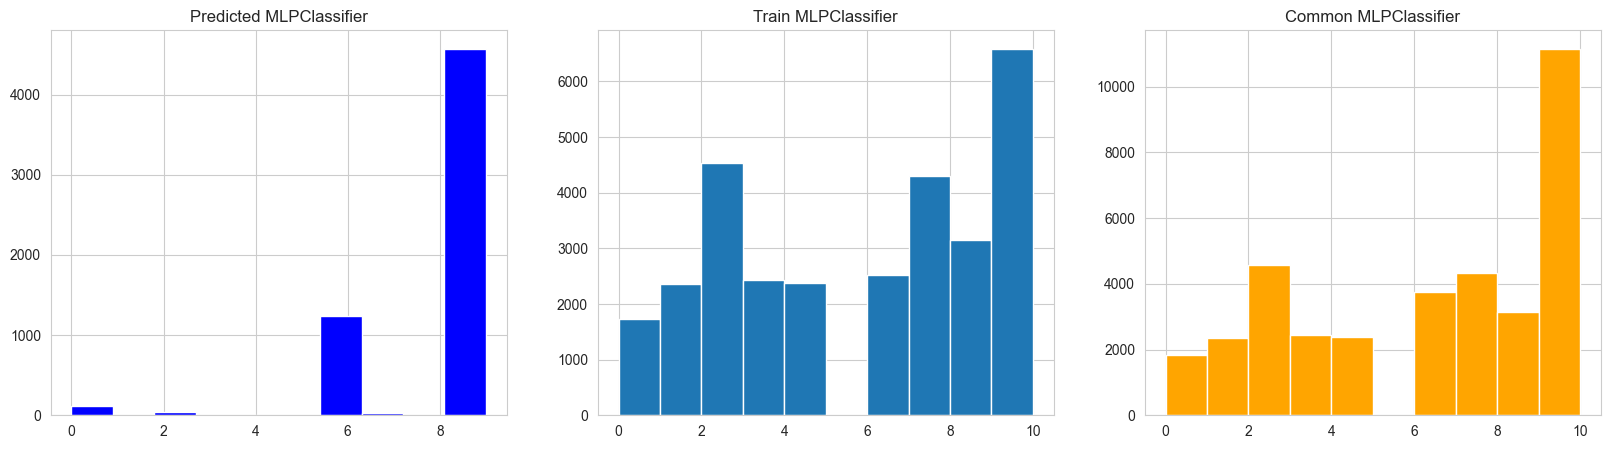

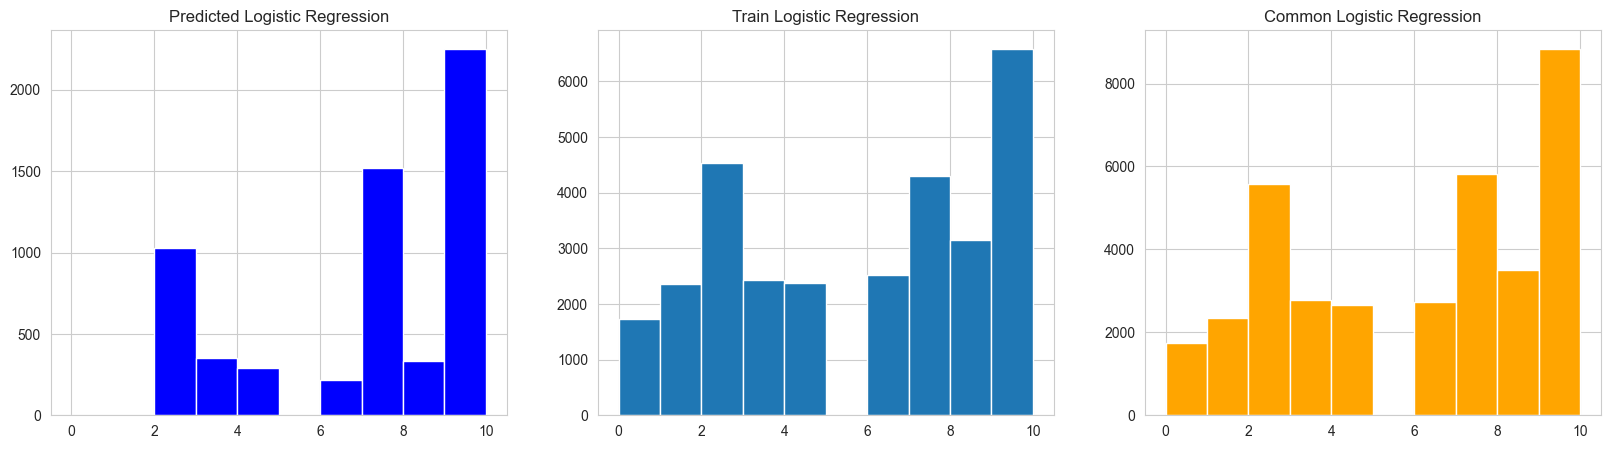

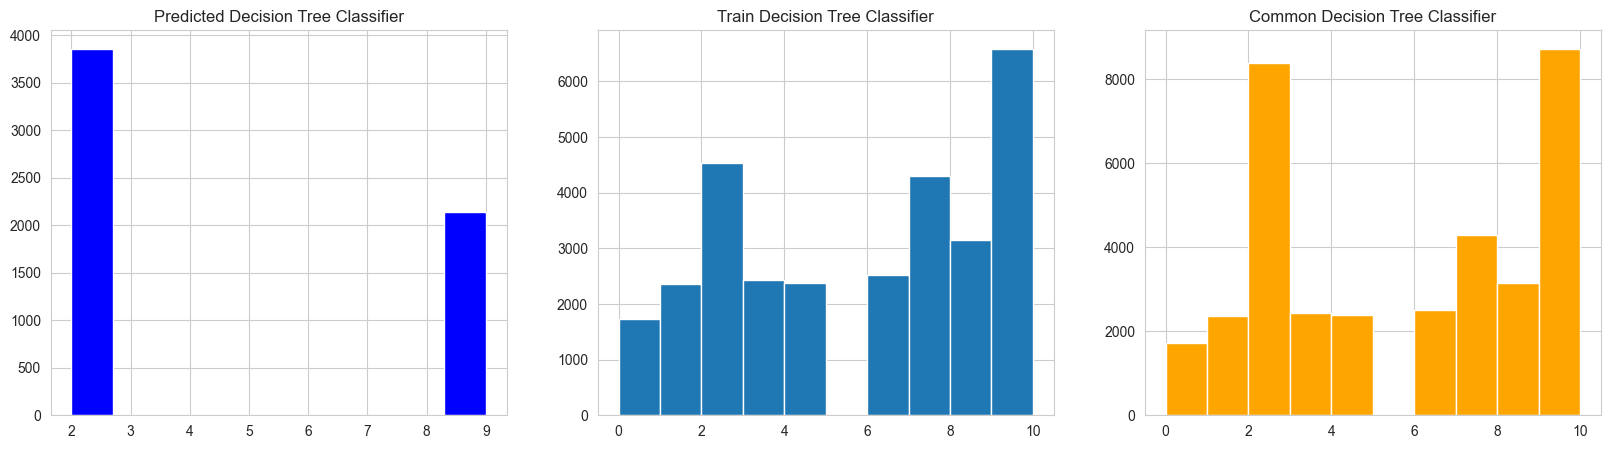

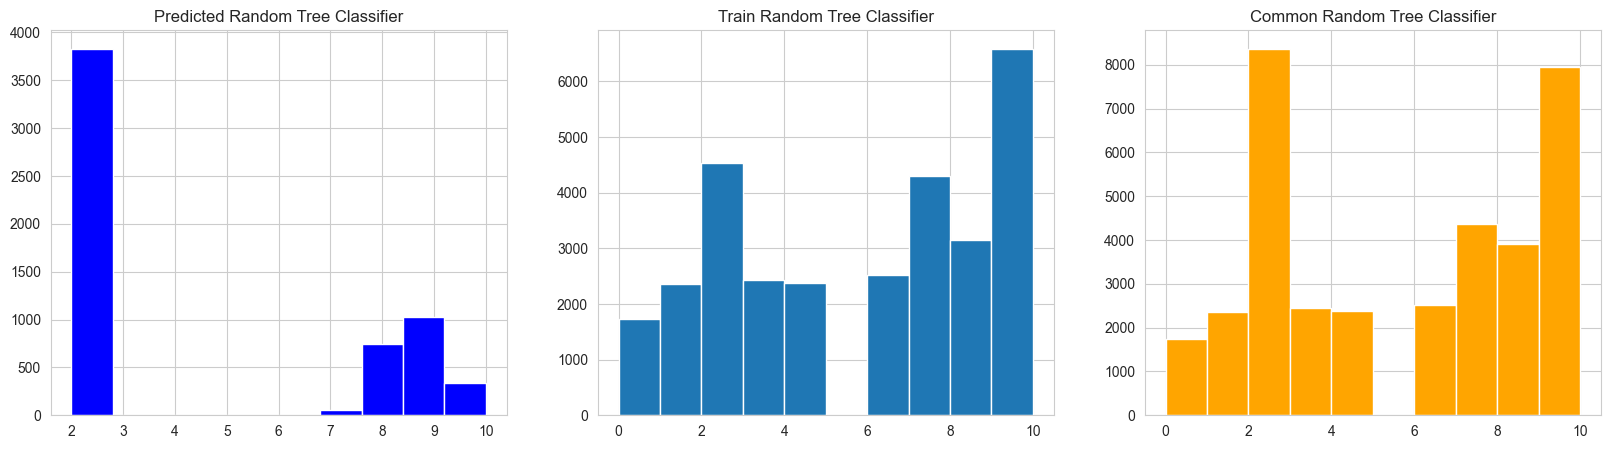

In [171]:
for c, name in zip((clf, log_model, tree_clf, random_clf), ('MLPClassifier','Logistic Regression','Decision Tree Classifier','Random Tree Classifier')):
    un_y = c.predict(unknown_x)
    un_counts, un_bins = np.histogram(un_y)

    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    plt.hist(un_bins[:-1], un_bins, weights=un_counts, color='blue')
    plt.title(f'Predicted {name}')

    plt.subplot(132)
    plt.hist(train_bins[:-1], train_bins, weights=train_counts)
    plt.title(f'Train {name}')

    common_y = np.concatenate([y, un_y])
    common_counts, common_bins = np.histogram(common_y)
    plt.subplot(133)
    plt.hist(common_bins[:-1], common_bins, weights=common_counts, color='orange')
    plt.title(f'Common {name}')

    plt.show()

In [172]:
unknown_y = clf.predict(unknown_x)

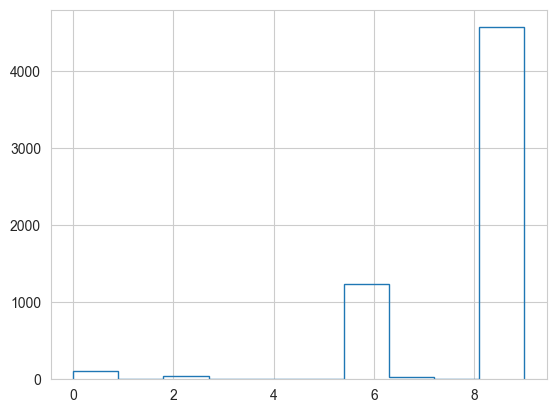

In [173]:
counts, bins = np.histogram(unknown_y)
plt.stairs(counts, bins)

In [174]:
bins

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

(array([1.140e+02, 0.000e+00, 4.500e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        1.238e+03, 2.900e+01, 0.000e+00, 4.573e+03]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

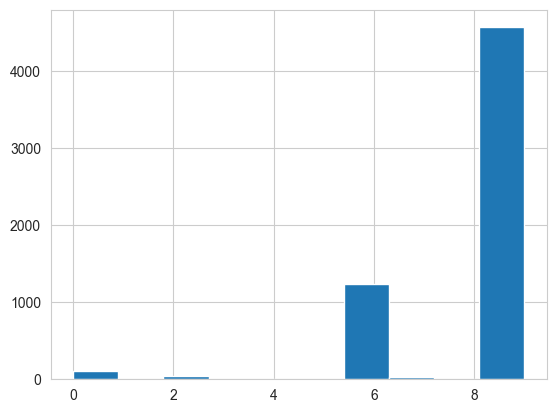

In [175]:
plt.hist(bins[:-1], bins, weights=counts)

(array([1732., 2354., 4537., 2437., 2378.,    0., 2517., 4300., 3156.,
        6589.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

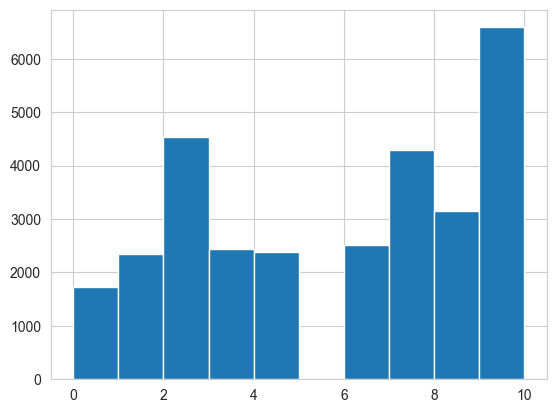

In [176]:
train_counts, train_bins = np.histogram(y)
plt.hist(train_bins[:-1], train_bins, weights=train_counts)

In [177]:
common_y = np.concatenate([y, unknown_y])

In [178]:
common_y.shape

(36000,)

(array([ 1846.,  2354.,  4582.,  2437.,  2379.,     0.,  3755.,  4329.,
         3156., 11162.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

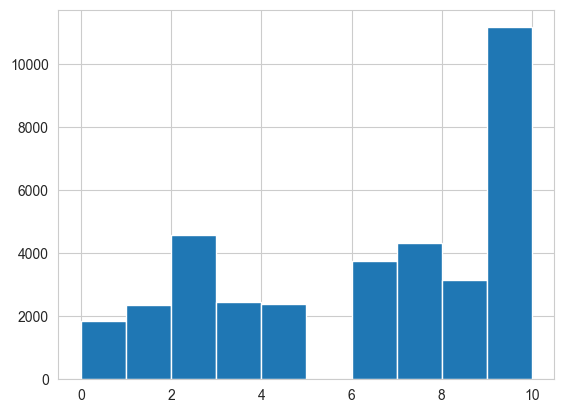

In [179]:
common_counts, common_bins = np.histogram(common_y)
plt.hist(common_bins[:-1], common_bins, weights=common_counts)